## GIVEN DATA/INFORMATION

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

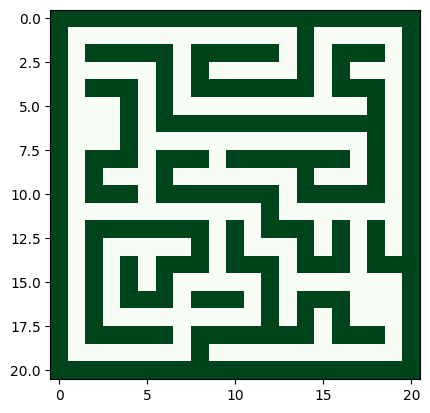

In [23]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

plt.imshow(build_maze("my_maze_25x25.txt"), cmap='Greens')

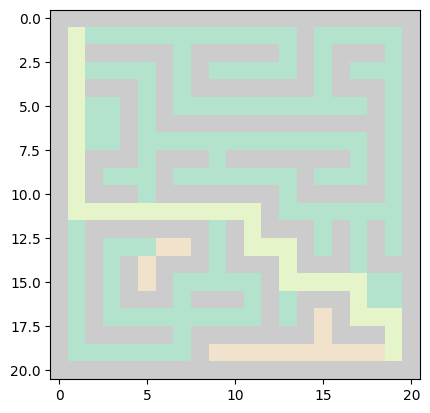

In [24]:
# Defining START and GOAL states
START=(1, 1)
GOAL=(24,24)

# Find_the_edges function to draw the graph/maze, assuming we move only in 4 directions (Up, Down, Right, Left)

def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

# BFS Algorithm

from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

# example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze[i[0],i[1]]=-3
for i in path:
    maze[i[0],i[1]]=-1


plt.imshow(maze, cmap='Pastel2')

# gray cells - means the walls of the maze
# dark green cells - means the visited cells of the maze
# light green cells - means the shortest path of the maze
# light brown - means the unvisited cells of the maze

# RELATED CODE
Going forward, the code which is necessary is available

Note: Although A* search is given in the problem statement, since we need to modify it (with heuristic function and W), I updated the code for A* search algorithm and placed it in below when solving TASK 2. However, dijkstra algorithm do not need any such changes, and that is given in the question, I am showing it below.

In [25]:
# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)

START=(1, 1)
GOAL=(24,24)

#### Dijkstra Algorithm

In [26]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    G = GOAL
    S = start_node

    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= G
    path = []
    while current != S: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(S) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

## TASK 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences) 
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the 
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze. 
Use your maze in the below tasks. 

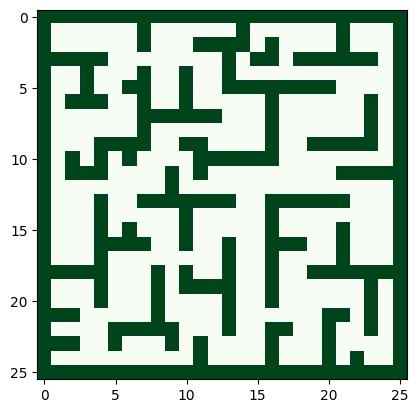

In [27]:
plt.imshow(build_maze("my_maze_25x25.txt"), cmap='Greens')

## TASK 2
A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates 

.     

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

In [28]:
# Calculating the Euclidean distance (for two points (x1, y1) and (x2, y2), the Euclidean distance is sqrt(pow(x2-x1, 2) + pow(y2-y1, 2)))

def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass


# Calculating the Manhattan distance (for two points (x1, y1) and (x2, y2), the Manhattan distance is abs(x2-x1) + abs(y2-y1))

def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return (abs(node2[0] - node1[0]) + abs(node2[1] - node1[1]))
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

# Using these Euclidean and Manhattan distance, 
# we updated the code for A* accordingly (as provided below)


#### (Modified) A* - search
(As mentioned in the question)

In [29]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, heuristic, W=1):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + W * heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [30]:
# Defining a shortest path and length function for given maze, start and end goal, with a heauristic function and weight

def find_shortest_path_and_length(graph, start, goal, heuristic_func, W=1):
    '''
    Find the shortest path and its length using A* algorithm with given heuristic function and weight W.

    Parameters:
        para1: Connected graph represented as a dictionary.
        para2: Starting node.
        para3: Goal node.
        para4: Heuristic function.
        para5: Weight factor (default is 1).

    Returns:
        return1: List of nodes representing the shortest path from start to goal.
        return2: Length of the shortest path.
    '''
    came_from, path = astar_path(graph, start, goal, heuristic_func, W)
    path_length = len(path) - 1  # Length of path is number of edges, not nodes
    return path, path_length

Shortest path using Euclidean distance: [(1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 11), (5, 11), (6, 11), (6, 12), (6, 13), (7, 13), (8, 13), (8, 12), (8, 11), (8, 10), (8, 9), (9, 9), (10, 9), (10, 10), (11, 10), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (13, 14), (14, 14), (14, 15), (15, 15), (16, 15), (17, 15), (18, 15), (19, 15), (20, 15), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (20, 19), (20, 20), (20, 21), (20, 22), (21, 22), (22, 22), (23, 22), (23, 23), (23, 24), (24, 24)]
Length of shortest path using Euclidean distance: 56


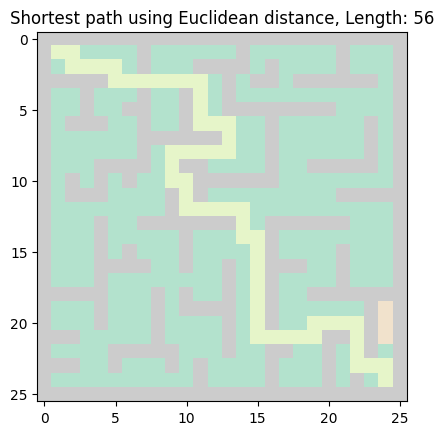

Shortest path using Manhattan distance: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 6), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (5, 12), (6, 12), (6, 13), (7, 13), (8, 13), (8, 12), (8, 11), (8, 10), (8, 9), (9, 9), (10, 9), (10, 10), (11, 10), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (13, 15), (14, 15), (15, 15), (16, 15), (17, 15), (18, 15), (19, 15), (20, 15), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (20, 19), (20, 20), (20, 21), (20, 22), (21, 22), (22, 22), (23, 22), (23, 23), (23, 24), (24, 24)]
Length of shortest path using Manhattan distance: 56


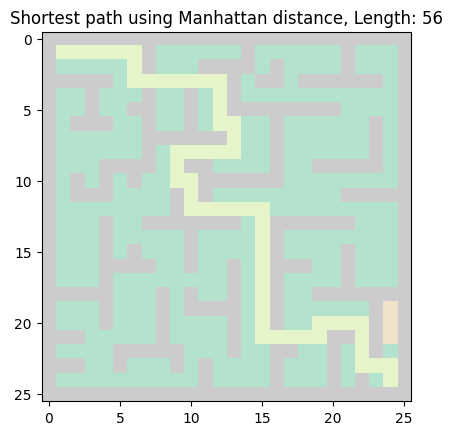

In [43]:
# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)

START=(1,1)
GOAL=(24,24)

# Using the shortest path function we defined above, we find the shortest path and length for both Euclidean and Manhattan heuristics and W=1
path1, length1 = find_shortest_path_and_length(graph, START, GOAL, Euclidean_distance, W=1)
path2, length2 = find_shortest_path_and_length(graph, START, GOAL, Manhattan_distance, W=1)

# EUCLIDEAN DISTANCE
print("Shortest path using Euclidean distance:", path1)
print("Length of shortest path using Euclidean distance:", length1)
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)
plt.figure()
for i in visited:
    maze[i[0],i[1]]=-3
for i in path1:
    maze[i[0],i[1]]=-1  # Marking shortest path
plt.title(f"Shortest path using Euclidean distance, Length: {length1}")
plt.imshow(maze, cmap='Pastel2')
plt.show()


# MANHATTAN DISTANCE
print("Shortest path using Manhattan distance:", path2)
print("Length of shortest path using Manhattan distance:", length2)
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)
plt.figure()
for i in visited:
    maze[i[0],i[1]]=-3  # Marking visited nodes
for i in path2:
    maze[i[0],i[1]]=-1  # Marking shortest path
plt.title(f"Shortest path using Manhattan distance, Length: {length2}")
plt.imshow(maze, cmap='Pastel2')
plt.show()

## TASK 3

In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the example above. ***Choose a broad set of values for W to see the difference.*** What is the length of the shortest path in each case?

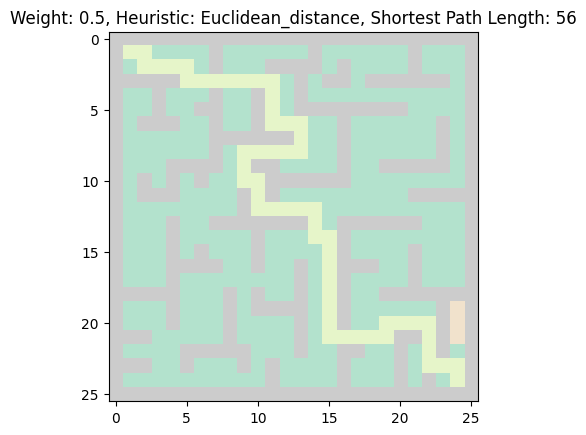

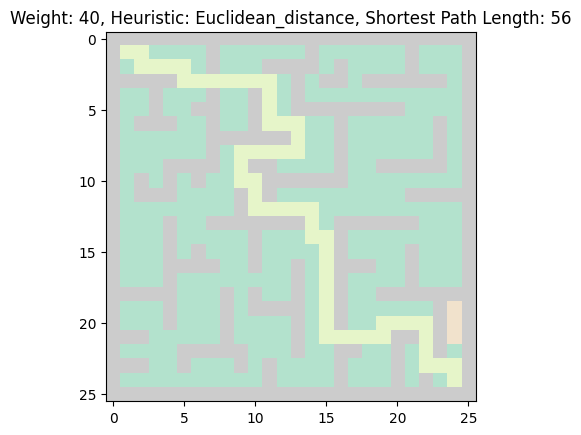

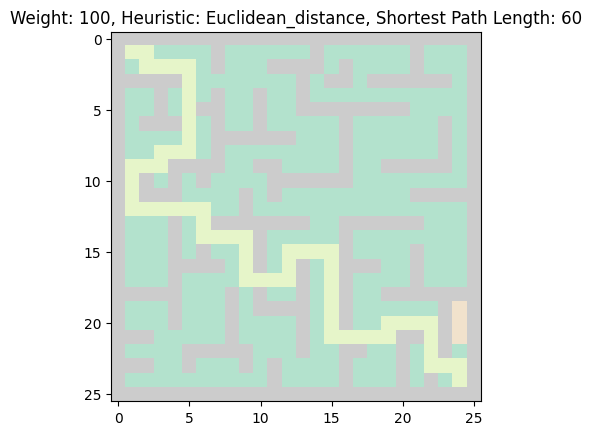

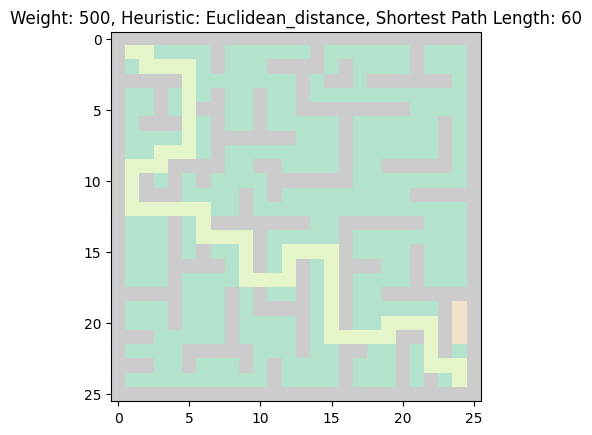

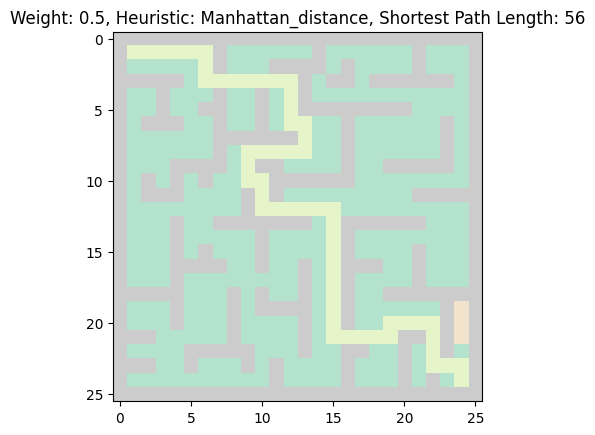

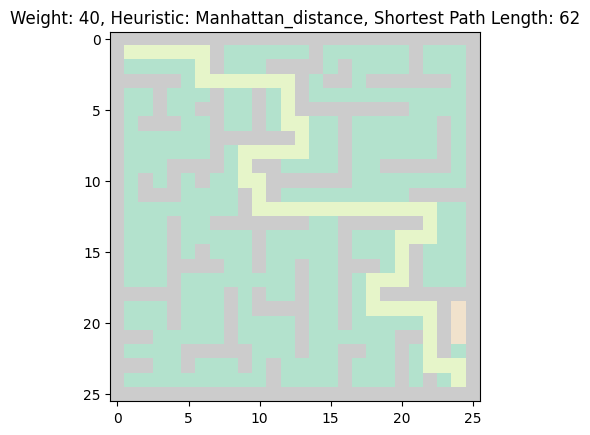

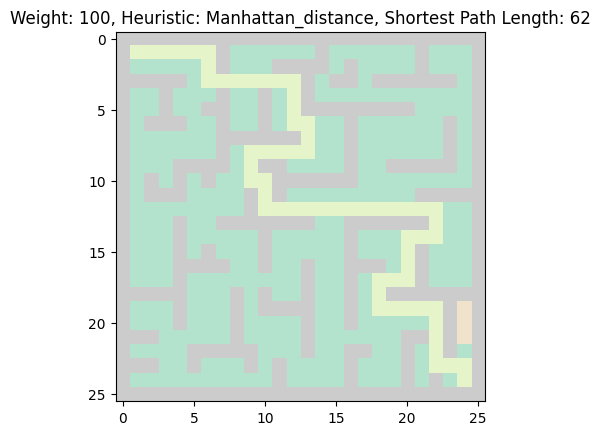

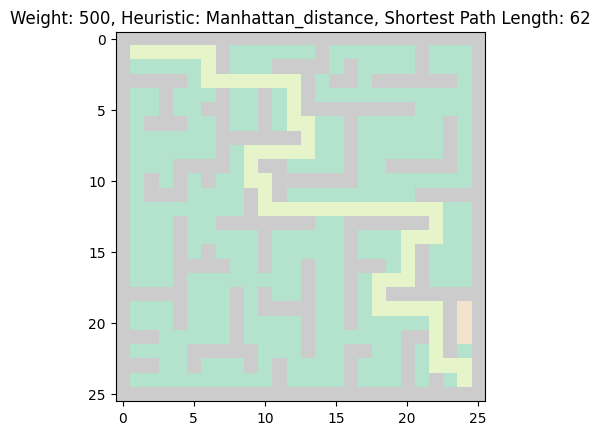

In [76]:
from collections import deque
import heapq


# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)
START = (1, 1)
GOAL = (24, 24)

# Defining weights and heuristic functions
weights = [0.5, 40, 100, 500]
heuristic_functions = [Euclidean_distance, Manhattan_distance]

# Iterating over each weight and heuristic function
for h in heuristic_functions:
    for weight in weights:
        # Finding the shortest path
        path, length = find_shortest_path_and_length(graph, START, GOAL, h, W=weight)
        
        maze = build_maze("my_maze_25x25.txt")
        graph = Find_the_edges(maze)
        plt.figure()
        for i in visited:
            maze[i[0],i[1]]=-3
        for i in path:
            maze[i[0],i[1]]=-1  # Marking shortest path
        plt.title(f"Weight: {weight}, Heuristic: {h.__name__}, Shortest Path Length: {length}")
        plt.imshow(maze, cmap='Pastel2')
        plt.show()

        # Resetting the maze
        maze = build_maze("my_maze_25x25.txt")

Explain what changes you observe for the different weights and why it occurs.

My observations from the various plots are as follows -

- As the weight increases, the length of the shortest path increases. So, best paths are available for lower value of W, i.e. when there is no dominance of heuristic
- This change is not observed for marginal increase in weights but for substantial increase.
- After a certain value of weight, no further increase in the weight changes the path. This can be attributed to the following reasons.    
   a. As the weight W increases, the algorithm places greater focus on heuristic function, which leads to bias. This will lead to exploring paths that are promising based on heuristic value alone, which might end up choosing paths that are not optimal.    
   b. Also, high value of W will make the heuristic more dominant. Once the heuristic becomes the decision making factor alone, any amount of increase in W will not lead to different optimal paths.

## TASK 4

Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

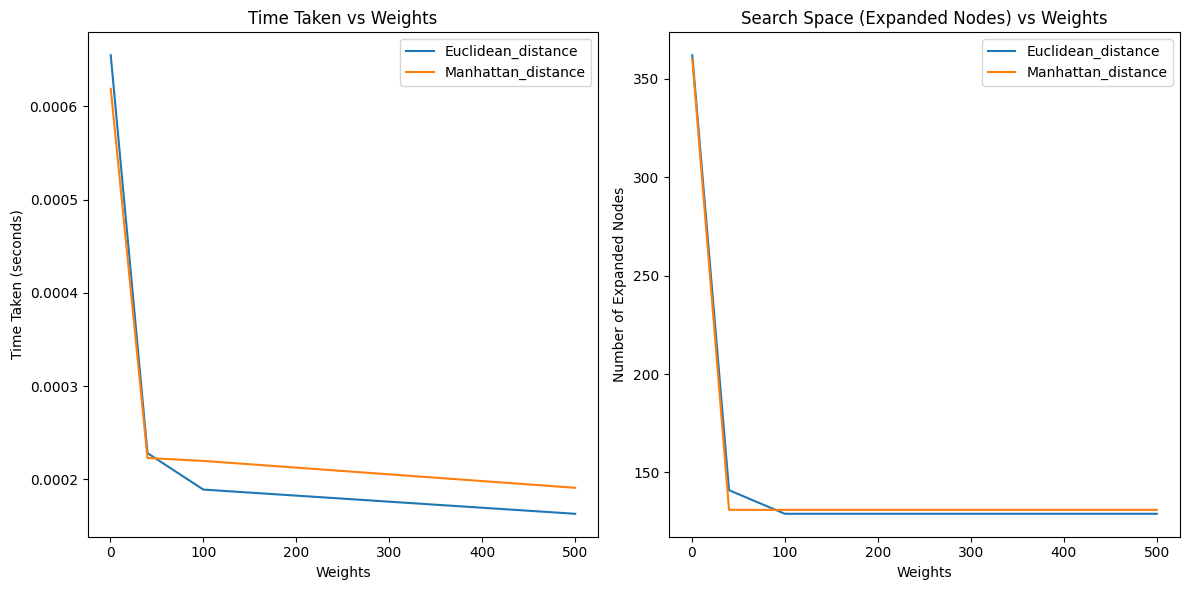

In [45]:
import time

# Loading the maze, building the graph, defining weights and heuristics for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)

weights = [0.5, 40, 100, 500]
heuristic_functions = [Euclidean_distance, Manhattan_distance]

# Initializing lists to store data
time_taken_data = {func.__name__: [] for func in heuristic_functions}
search_space_data = {func.__name__: [] for func in heuristic_functions}

# Iterating over each weight and heuristic function to find the time space and search space
for weight in weights:
    for heuristic_func in heuristic_functions:
        start_time = time.time()
        # Finding the shortest path
        path, length = find_shortest_path_and_length(graph, START, GOAL, heuristic_func, W=weight)
        end_time = time.time()
        time_taken = end_time - start_time
        
        # Calculating the number of expanded nodes
        visited_nodes, _ = astar_path(graph, START, GOAL, heuristic_func, W=weight)
        num_expanded_nodes = len(visited_nodes)
        
        # Appending data to lists
        time_taken_data[heuristic_func.__name__].append((weight, time_taken))
        search_space_data[heuristic_func.__name__].append((weight, num_expanded_nodes))

# a) Plotting time taken versus weights
plt.figure(figsize=(12, 6))
plt.subplot(121)
for heuristic, data in time_taken_data.items():
    weights, times = zip(*data)
    plt.plot(weights, times, label=heuristic)
plt.title("Time Taken vs Weights")
plt.xlabel("Weights")
plt.ylabel("Time Taken (seconds)")
plt.legend()

# b) Plotting search space (expanded nodes) versus weights
plt.subplot(122)
for heuristic, data in search_space_data.items():
    weights, expanded_nodes = zip(*data)
    plt.plot(weights, expanded_nodes, label=heuristic)
plt.title("Search Space (Expanded Nodes) vs Weights")
plt.xlabel("Weights")
plt.ylabel("Number of Expanded Nodes")
plt.legend()

plt.tight_layout()
plt.show()


As I was exploring on different weights, I observed substantial changes in the values of weights that are closer by. To demonstrate it, I provided graphs for two types of weight (Code remained the same as above graph)

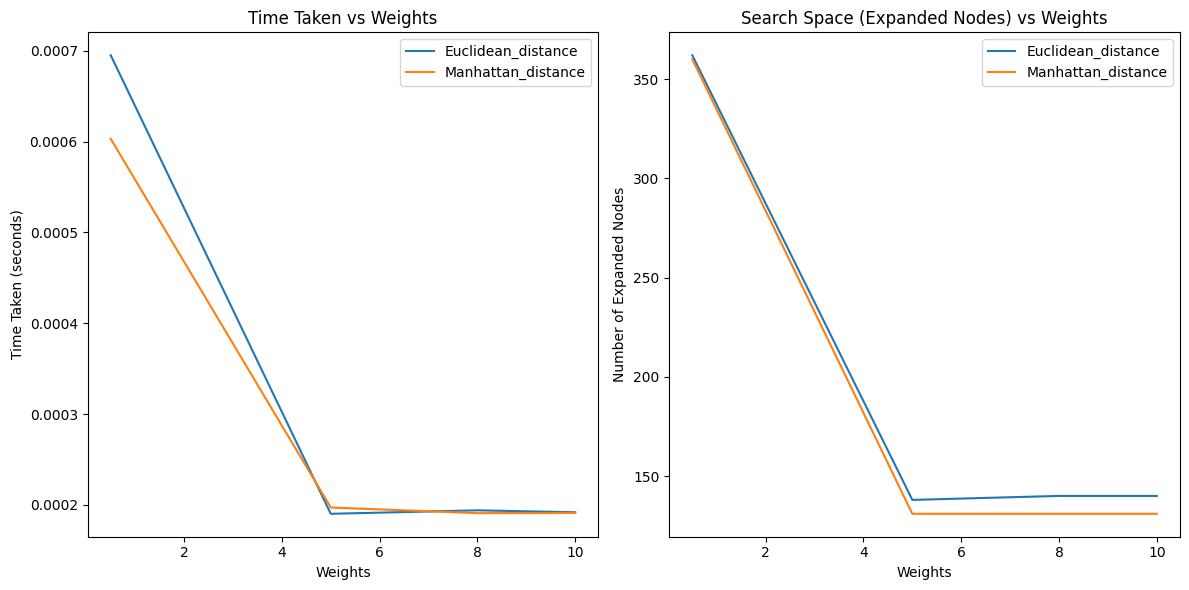

In [52]:

# weights = [0.5, 5, 8, 10]


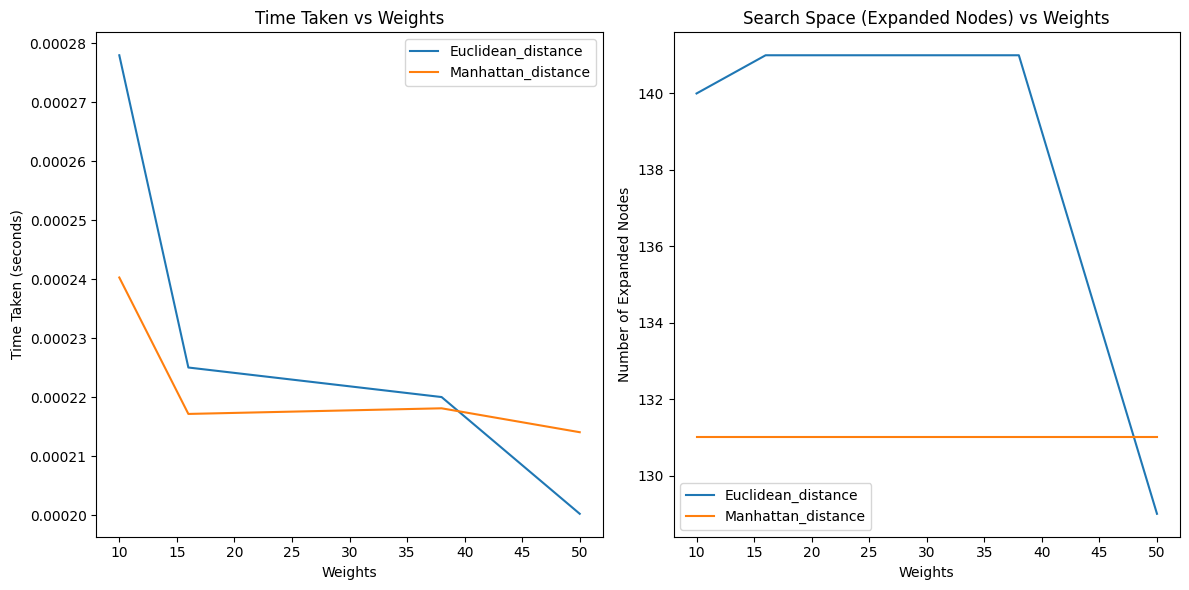

In [71]:

# weights = [10, 16, 38, 50]


## TASK 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Length of the shortest path using Dijkstra's algorithm: 56


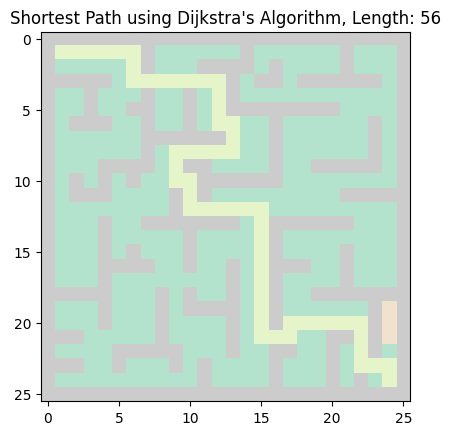

In [46]:
# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges(maze)

# Finding the shortest path using Dijkstra's algorithm
previous_nodes, path = dijkstra_algorithm(graph, START, GOAL)

# Visualizing the solution in the maze
for node in visited:
    maze[node[0], node[1]] = -3  # Mark shortest path
for node in path:
    maze[node[0], node[1]] = -1  # Mark shortest path

# Calculating the length of the shortest path
shortest_path_length = len(path) - 1  # Length of path is number of edges, not nodes
print("Length of the shortest path using Dijkstra's algorithm:", shortest_path_length)

# Plotting the maze with the shortest path
plt.figure()
plt.imshow(maze, cmap='Pastel2')
plt.title(f"Shortest Path using Dijkstra's Algorithm, Length: {shortest_path_length}")
plt.show()

## TASK 6
Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Length of shortest path using BFS is 56


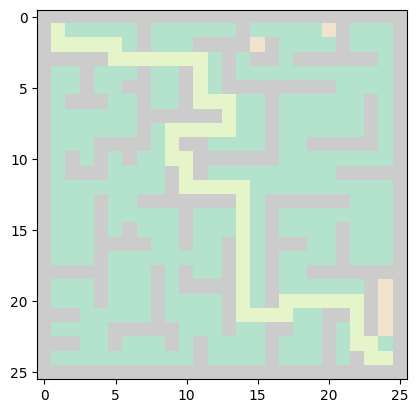

In [35]:
# Writing the START and GOAL values again just for a wholistic perspective of the code
START=(1, 1)
GOAL=(24,24)

maze=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze)
visited, path = BreadthFirst(graph, START, GOAL)
count_BFS = 0    # To track the length of the shortest path using BFS when solving the maze
for i in visited:
    maze[i[0],i[1]]=-3
for i in path:
    maze[i[0],i[1]]=-1
    count_BFS = count_BFS + 1

count_BFS = count_BFS - 1   # Since we will count 1 extra time on the last run of the loop
print("Length of shortest path using BFS is " + str(count_BFS))
plt.imshow(maze, cmap='Pastel2')

## TASK 7

Choose 3 random START and GOAL states, and repeat the below tasks:

- Run A* algorithm with the two heuristic functions for W=1. 

- Run Dijkstra algorithm. 

- Run BFS algorithm. 


Visualize the solution for each. Explain your observations.

In [36]:
# We first create a function which prints the shortest path and visualises it for the three algorithms for different START and GOAL points.
# The function takes Start and Goal points as inputs

def run_three_algorithms(start_pt, goal_pt):
    
    START = start_pt
    GOAL = goal_pt
    
    # A* - SEARCH ALGORITHM

    # Loading the maze and building the graph for a wholistic perspective
    maze = build_maze("my_maze_25x25.txt")
    graph = Find_the_edges(maze)

    # Using the shortest path function we defined above, 
    # we find the shortest path and length for both Euclidean and Manhattan heuristics and W=1
    path1, length1 = find_shortest_path_and_length(graph, START, GOAL, Euclidean_distance, W=1)
    path2, length2 = find_shortest_path_and_length(graph, START, GOAL, Manhattan_distance, W=1)

    # EUCLIDEAN DISTANCE
    print("Shortest path using Euclidean distance:", path1)
    print("Length of shortest path using Euclidean distance:", length1)
    maze = build_maze("my_maze_25x25.txt")
    graph = Find_the_edges(maze)
    plt.figure()
    for i in path1:
        maze[i[0],i[1]]=-1  # Marking shortest path
    plt.title(f"Shortest path using Euclidean distance, Length: {length1}")
    plt.imshow(maze, cmap='Pastel2')
    plt.show()


    # MANHATTAN DISTANCE
    print("Shortest path using Manhattan distance:", path2)
    print("Length of shortest path using Manhattan distance:", length2)
    maze = build_maze("my_maze_25x25.txt")
    graph = Find_the_edges(maze)
    plt.figure()
    for i in path2:
        maze[i[0],i[1]]=-1  # Marking shortest path
    plt.title(f"Shortest path using Manhattan distance, Length: {length2}")
    plt.imshow(maze, cmap='Pastel2')
    plt.show()



    # DIJKSTRA ALGORITHM

    # Loading the maze and building the graph for a wholistic perspective
    maze = build_maze("my_maze_25x25.txt")
    graph = Find_the_edges(maze)

    # Finding the shortest path using Dijkstra's algorithm
    previous_nodes, path = dijkstra_algorithm(graph, START, GOAL)

    # Visualizing the solution in the maze
    for node in path:
        maze[node[0], node[1]] = -1  # Mark shortest path

    # Calculating the length of the shortest path
    shortest_path_length = len(path) - 1  # Length of path is number of edges, not nodes
    print("Length of the shortest path using Dijkstra's algorithm:", shortest_path_length)

    # Plotting the maze with the shortest path
    plt.figure()
    plt.imshow(maze, cmap='Pastel2')
    plt.title(f"Shortest Path using Dijkstra's Algorithm, Length: {shortest_path_length}")
    plt.show()



    # BFS ALGORITHM

    maze=build_maze("my_maze_25x25.txt")
    graph=Find_the_edges(maze)
    visited, path = BreadthFirst(graph, START, GOAL)
    count_BFS = 0    # To track the length of the shortest path using BFS when solving the maze
    for i in visited:
        maze[i[0],i[1]]=-3
    for i in path:
        maze[i[0],i[1]]=-1
        count_BFS = count_BFS + 1
    count_BFS = count_BFS - 1   # Since we will count 1 extra time on the last run of the loop
    plt.imshow(maze, cmap='Pastel2')
    print("Length of shortest path using BFS is " + str(count_BFS))

Shortest path using Euclidean distance: [(5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (11, 8), (10, 8), (10, 9), (10, 10), (11, 10), (12, 10), (12, 11), (12, 12), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 20), (4, 19), (4, 18), (4, 17), (3, 17), (2, 17), (2, 18), (1, 18), (1, 19)]
Length of shortest path using Euclidean distance: 49


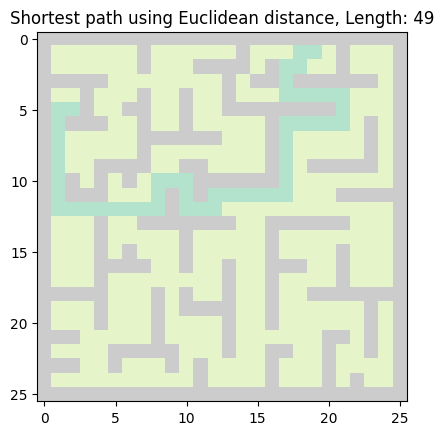

Shortest path using Manhattan distance: [(5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (11, 5), (11, 6), (11, 7), (10, 7), (10, 8), (10, 9), (10, 10), (11, 10), (12, 10), (12, 11), (12, 12), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 20), (4, 19), (4, 18), (4, 17), (3, 17), (2, 17), (1, 17), (1, 18), (1, 19)]
Length of shortest path using Manhattan distance: 49


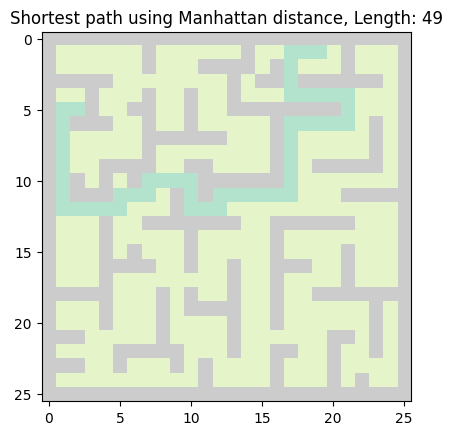

Length of the shortest path using Dijkstra's algorithm: 49


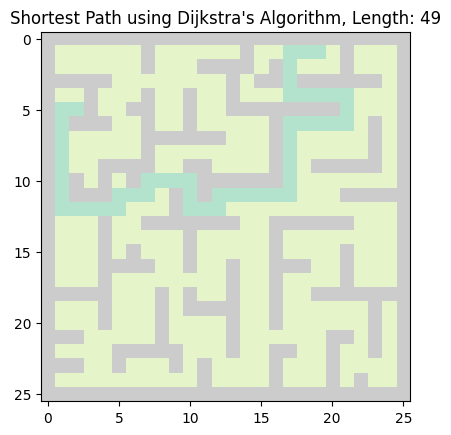

Length of shortest path using BFS is 49


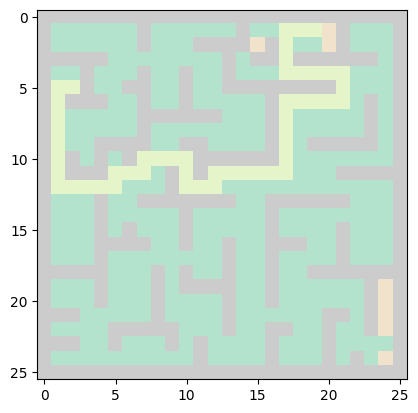

In [37]:
# (Observations after all the graphs)
# RANDOM START AND GOAL 1

START_1 = (5,2)
GOAL_1 = (1,19)

run_three_algorithms(START_1, GOAL_1)

Shortest path using Euclidean distance: [(24, 2), (24, 3), (23, 3), (22, 3), (21, 3), (21, 4), (21, 5), (20, 5), (19, 5), (19, 6), (18, 6), (18, 7), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (16, 11), (15, 11), (14, 11), (14, 12), (14, 13), (14, 14), (13, 14), (12, 14), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (7, 18), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 22), (4, 23), (4, 24), (3, 24), (2, 24), (1, 24)]
Length of shortest path using Euclidean distance: 45


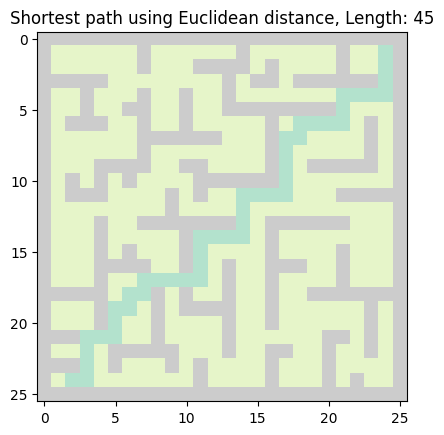

Shortest path using Manhattan distance: [(24, 2), (24, 3), (23, 3), (22, 3), (21, 3), (21, 4), (21, 5), (20, 5), (19, 5), (18, 5), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (16, 11), (15, 11), (14, 11), (14, 12), (14, 13), (14, 14), (13, 14), (12, 14), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 22), (4, 23), (4, 24), (3, 24), (2, 24), (1, 24)]
Length of shortest path using Manhattan distance: 45


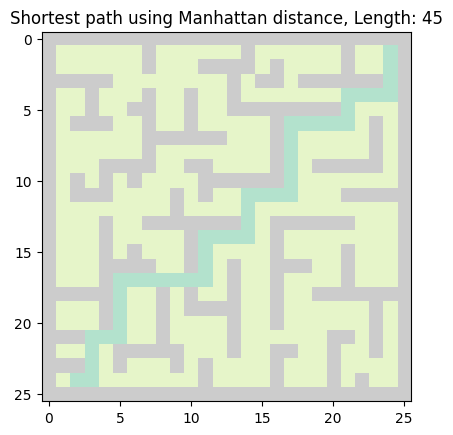

Length of the shortest path using Dijkstra's algorithm: 45


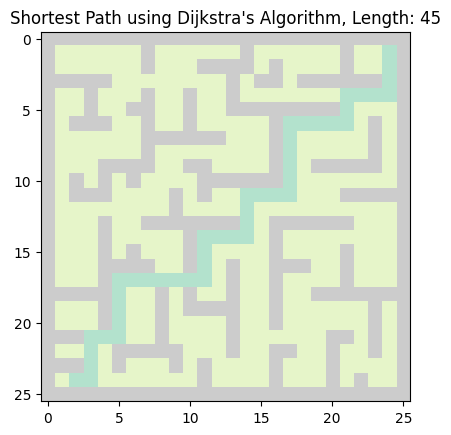

Length of shortest path using BFS is 45


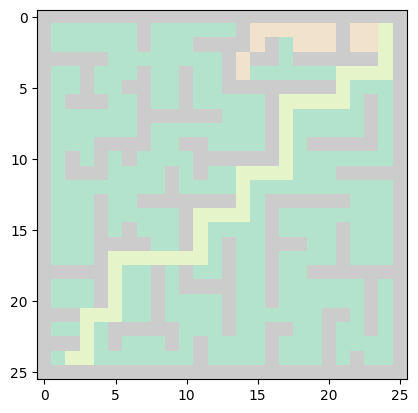

In [38]:
# RANDOM START AND GOAL 2

START_2 = (24,2)
GOAL_2 = (1,24)

run_three_algorithms(START_2, GOAL_2)

Shortest path using Euclidean distance: [(20, 1), (20, 2), (20, 3), (21, 3), (21, 4), (21, 5), (20, 5), (19, 5), (18, 5), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (16, 11), (15, 11), (14, 11), (14, 12), (14, 13), (14, 14), (13, 14), (12, 14), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 20), (4, 19), (4, 18), (4, 17), (4, 16), (4, 15), (4, 14), (3, 14)]
Length of shortest path using Euclidean distance: 46


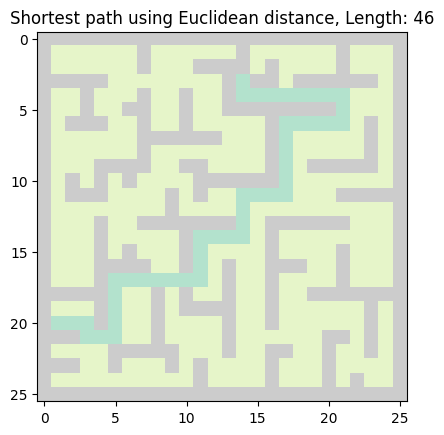

Shortest path using Manhattan distance: [(20, 1), (20, 2), (20, 3), (21, 3), (21, 4), (21, 5), (20, 5), (19, 5), (18, 5), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (16, 11), (15, 11), (14, 11), (14, 12), (14, 13), (14, 14), (13, 14), (12, 14), (11, 14), (11, 15), (11, 16), (11, 17), (10, 17), (9, 17), (8, 17), (7, 17), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (5, 21), (4, 21), (4, 20), (4, 19), (4, 18), (4, 17), (4, 16), (4, 15), (4, 14), (3, 14)]
Length of shortest path using Manhattan distance: 46


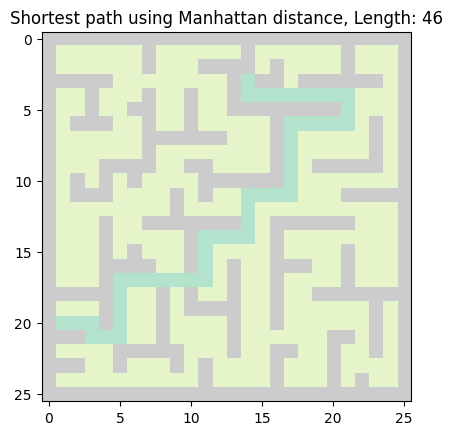

Length of the shortest path using Dijkstra's algorithm: 46


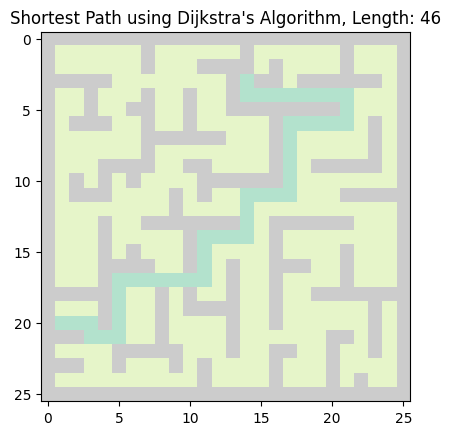

Length of shortest path using BFS is 46


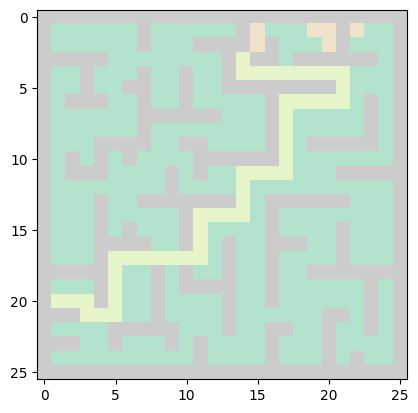

In [39]:
# RANDOM START AND GOAL 3

START_3 = (20,1)
GOAL_3 = (3,14)

run_three_algorithms(START_3, GOAL_3)

OBSERVATIONS-

When we use weight(W) of heuristic as 1, we find that in all the 3 cases (of START AND GOAL points), the optimal path is the same. This can mean -
- The maze structure is not relatively quite complex.
- Optimality of the path. The identified path in each of the case is the best path available.
- Heuristic effectiveness did not provide any advantage in determining a better solution

## TASK 8

The inital assumption which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the below tasks:

- Run A* algorithm with the two heuristic functions for W=1. 

- Run Dijkstra algorithm. 

- Run BFS algorithm. 


Visualize the solution for each. Explain your observations

In [40]:
def Find_the_edges_with_diagonal(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph = {}
    grid_size = len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if maze[i][j] != 1:
                adj = []
                # Generate diagonal neighbors
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx != 0 or dy != 0:  # Exclude the current node
                            x, y = i + dx, j + dy
                            if 0 <= x < grid_size and 0 <= y < grid_size and maze[x][y] == 0:
                                adj.append((x, y))
                graph[(i, j)] = adj
    return graph


Shortest path using Euclidean distance: [(1, 1), (2, 2), (2, 3), (2, 4), (3, 5), (4, 6), (5, 5), (6, 5), (7, 4), (8, 3), (9, 2), (10, 1), (11, 1), (12, 2), (13, 3), (12, 4), (13, 5), (14, 6), (15, 7), (16, 8), (17, 9), (18, 9), (19, 9), (20, 10), (21, 11), (22, 12), (23, 13), (23, 14), (22, 15), (21, 16), (21, 17), (22, 18), (21, 19), (20, 20), (20, 21), (21, 22), (22, 22), (23, 23), (24, 24)]
Length of shortest path using Euclidean distance: 38


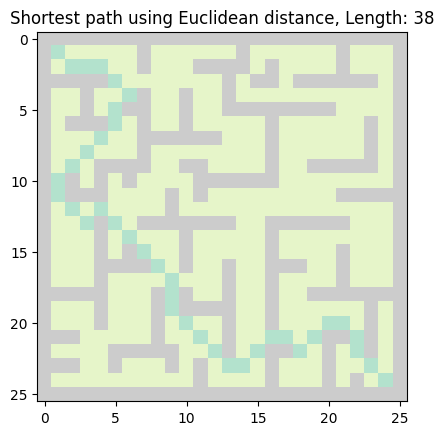

Shortest path using Manhattan distance: [(1, 1), (2, 2), (2, 3), (2, 4), (3, 5), (4, 6), (3, 7), (4, 8), (4, 9), (3, 10), (4, 11), (5, 12), (6, 13), (7, 13), (8, 12), (8, 11), (8, 10), (9, 9), (10, 10), (11, 10), (12, 11), (12, 12), (12, 13), (13, 14), (14, 15), (15, 15), (16, 15), (17, 15), (18, 15), (19, 15), (20, 15), (21, 16), (21, 17), (22, 18), (21, 19), (20, 20), (20, 21), (21, 22), (22, 22), (23, 23), (24, 24)]
Length of shortest path using Manhattan distance: 40


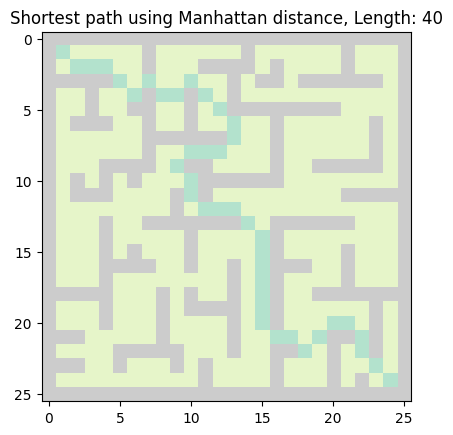

Length of the shortest path using Dijkstra's algorithm: 38


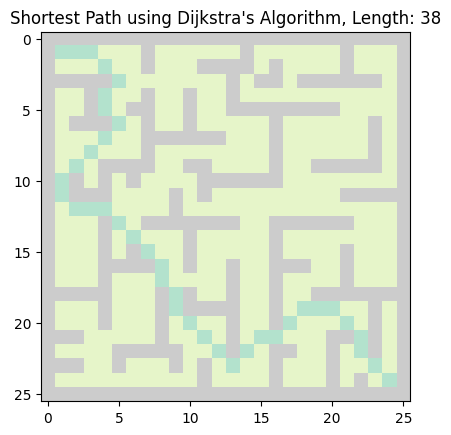

Length of shortest path using BFS is 38


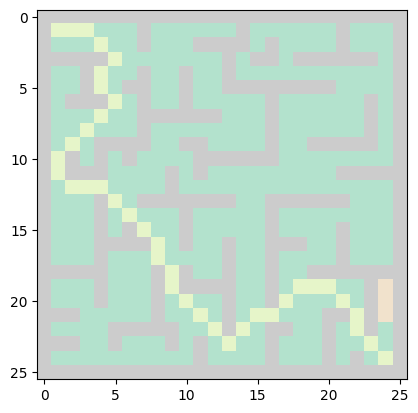

In [72]:
# We first create a function which prints the shortest path and visualises it for the three algorithms for different START and GOAL points.
# The function takes Start and Goal points as inputs

START_1 = (1,1)
GOAL_1 = (24,24)

# A* - SEARCH ALGORITHM

# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges_with_diagonal(maze)

# Using the shortest path function we defined above, 
# we find the shortest path and length for both Euclidean and Manhattan heuristics and W=1
path1, length1 = find_shortest_path_and_length(graph, START, GOAL, Euclidean_distance, W=1)
path2, length2 = find_shortest_path_and_length(graph, START, GOAL, Manhattan_distance, W=1)

# EUCLIDEAN DISTANCE
print("Shortest path using Euclidean distance:", path1)
print("Length of shortest path using Euclidean distance:", length1)
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges_with_diagonal(maze)
plt.figure()
for i in path1:
    maze[i[0],i[1]]=-1  # Marking shortest path
plt.title(f"Shortest path using Euclidean distance, Length: {length1}")
plt.imshow(maze, cmap='Pastel2')
plt.show()


# MANHATTAN DISTANCE
print("Shortest path using Manhattan distance:", path2)
print("Length of shortest path using Manhattan distance:", length2)
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges_with_diagonal(maze)
plt.figure()
for i in path2:
    maze[i[0],i[1]]=-1  # Marking shortest path
plt.title(f"Shortest path using Manhattan distance, Length: {length2}")
plt.imshow(maze, cmap='Pastel2')
plt.show()



# DIJKSTRA ALGORITHM

# Loading the maze and building the graph for a wholistic perspective
maze = build_maze("my_maze_25x25.txt")
graph = Find_the_edges_with_diagonal(maze)

# Finding the shortest path using Dijkstra's algorithm
previous_nodes, path = dijkstra_algorithm(graph, START, GOAL)

# Visualizing the solution in the maze
for node in path:
    maze[node[0], node[1]] = -1  # Mark shortest path

# Calculating the length of the shortest path
shortest_path_length = len(path) - 1  # Length of path is number of edges, not nodes
print("Length of the shortest path using Dijkstra's algorithm:", shortest_path_length)

# Plotting the maze with the shortest path
plt.figure()
plt.imshow(maze, cmap='Pastel2')
plt.title(f"Shortest Path using Dijkstra's Algorithm, Length: {shortest_path_length}")
plt.show()



# BFS ALGORITHM

maze=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_with_diagonal(maze)
visited, path = BreadthFirst(graph, START, GOAL)
count_BFS = 0    # To track the length of the shortest path using BFS when solving the maze
for i in visited:
    maze[i[0],i[1]]=-3
for i in path:
    maze[i[0],i[1]]=-1
    count_BFS = count_BFS + 1
count_BFS = count_BFS - 1   # Since we will count 1 extra time on the last run of the loop
plt.imshow(maze, cmap='Pastel2')
print("Length of shortest path using BFS is " + str(count_BFS))

OBSERVATIONS-

When we use weight(W) of heuristic as 1, we find that in all the 3 cases (of START AND GOAL points), the optimal path is different. This can mean -
- Manhattan distance heuristic had the worst performance in this scenario
- BFS, Dijstra and Euclidean has the same and most optimal path.
- Heuristic effectiveness proved as an advantage in the case of Euclidean distance
- The distance is significantly lesser when compared to similar START and GOAL but with diagonally acceptable movement. This is specially attributed to the not so relatively dense or complex maze structure. This allowed for quite a few diagonal moves.

### Bonus Task: Solving "Sliding Tile Puzzle" with A*-Search
The initial and the final configurations are given at the image below. 
You can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1.
Add your code and print the optimal action sequence (which tile to move) from the intial to the final configuration.

In [75]:
# I considered the blank space as zero to easily work with numbers during computations.

import heapq

# Defining the START and GOAL state
START = [[7, 2, 4],
               [5, 0, 6],
               [8, 3, 1]]

GOAL = [[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]]

# Defining actions
ACTIONS = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Left, Right, Up, Down
ACTION_NAMES = ["Move right", "Move left", "Move down", "Move up"]


# Function to find the position of the blank tile
def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == 0:
                return i, j


# Function to generate successor states
def successors(state):
    successors = []
    blank_i, blank_j = find_blank(state)

    for action_index, action in enumerate(ACTIONS):
        new_i, new_j = blank_i + action[0], blank_j + action[1]
        if 0 <= new_i < 3 and 0 <= new_j < 3:
            new_state = [row[:] for row in state]
            new_state[blank_i][blank_j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[blank_i][blank_j]
            successors.append((new_state, action_index, new_i, new_j))
    return successors


# Heuristic function h1: Number of displaced tiles
def h1(state):
    displaced = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != GOAL[i][j]:
                displaced += 1
    return displaced


# A* Search algorithm
def a_star_search(start_state, goal_state, heuristic):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start_state), 0, start_state, []))
    closed_set = set()

    while open_list:
        _, cost, current_state, path = heapq.heappop(open_list)
        if current_state == goal_state:
            return path
        if tuple(map(tuple, current_state)) in closed_set:
            continue
        closed_set.add(tuple(map(tuple, current_state)))

        for successor, action_index, new_i, new_j in successors(current_state):
            new_cost = cost + 1
            new_path = path + [(ACTION_NAMES[action_index], current_state[new_i][new_j])]
            heapq.heappush(open_list, (new_cost + heuristic(successor), new_cost, successor, new_path))

    return None


# Solving the puzzle
optimal_path = a_star_search(START, GOAL, h1)

# Printing the optimal action sequence
print("Optimal Action Sequence:")
count_SP=0
for action in optimal_path:
    print("Tile:", action[1], "->", action[0])
    count_SP = count_SP + 1
print(f"Optimal sequence in {count_SP} moves")

Optimal Action Sequence:
Tile: 5 -> Move right
Tile: 7 -> Move down
Tile: 2 -> Move left
Tile: 5 -> Move up
Tile: 6 -> Move left
Tile: 1 -> Move up
Tile: 3 -> Move right
Tile: 8 -> Move right
Tile: 7 -> Move down
Tile: 6 -> Move left
Tile: 1 -> Move left
Tile: 3 -> Move up
Tile: 8 -> Move right
Tile: 7 -> Move right
Tile: 6 -> Move down
Tile: 1 -> Move left
Tile: 3 -> Move left
Tile: 4 -> Move down
Tile: 5 -> Move right
Tile: 2 -> Move right
Tile: 1 -> Move up
Tile: 3 -> Move left
Tile: 4 -> Move left
Tile: 5 -> Move down
Tile: 2 -> Move right
Tile: 1 -> Move right
Optimal path in 26


## END